In [1]:
import pandas as pd
pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)
from classes import Paths
import seaborn as sns
sns.set_theme(style="whitegrid", palette="Set2")
from sklearn.preprocessing import PolynomialFeatures

In [2]:
paths = Paths()
path = paths.pr_generate_gold_feature
df = pd.read_csv(path)
df.reset_index(
    drop=False
    , inplace=True
)
df.rename(
    columns={"index": "id"}
    , inplace=True
)
df.head(10)

,id,feature_1,feature_2,feature_3,label
0,0,2.50,0.00,58,B
1,1,2.50,0.02,61,B
2,2,2.50,0.05,33,B
3,3,2.50,0.07,89,B
4,4,2.50,0.10,58,B
5,5,2.50,0.12,81,B
6,6,2.50,0.15,29,B
7,7,2.49,0.17,68,B
8,8,2.49,0.20,36,B
9,9,2.49,0.22,84,B


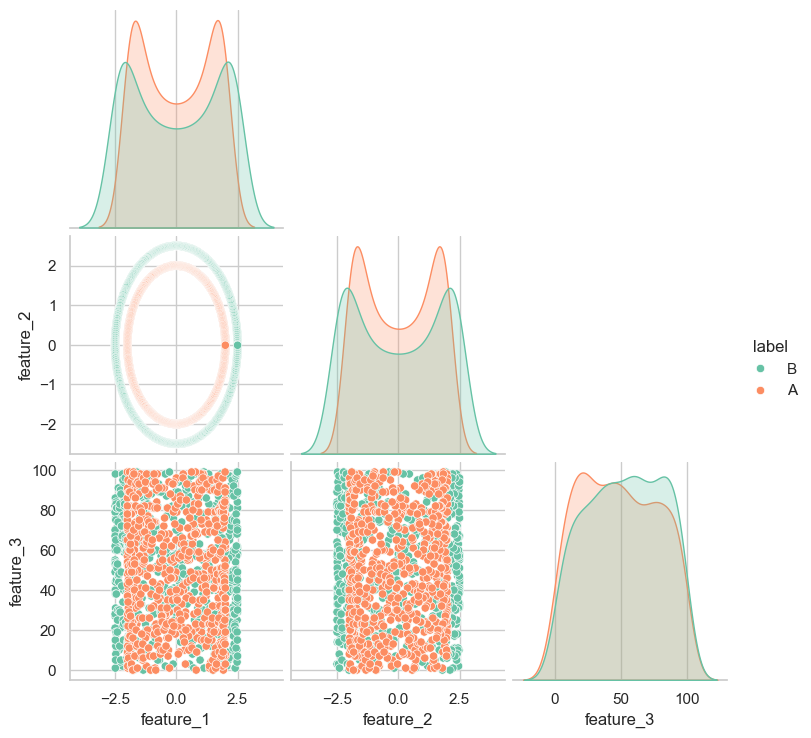

In [3]:
sns.pairplot(
    df[['feature_1', 'feature_2', 'feature_3', 'label']]
    , hue="label"
    , corner=True
);

In [4]:
data = df.copy()

# generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[["feature_1", "feature_2", "feature_3"]])

# add polynomial features to the original data
poly_data = pd.concat([data, pd.DataFrame(poly_features)], axis=1)
poly_data

,id,feature_1,feature_2,feature_3,label,0,1,2,3,4,5,6,7,8
0,0,2.50,0.00,58,B,2.50,0.00,58.00,6.25,0.00,145.00,0.00,0.00,"3,364.00"
1,1,2.50,0.02,61,B,2.50,0.02,61.00,6.25,0.05,152.50,0.00,1.22,"3,721.00"
2,2,2.50,0.05,33,B,2.50,0.05,33.00,6.25,0.12,82.50,0.00,1.65,"1,089.00"
3,3,2.50,0.07,89,B,2.50,0.07,89.00,6.25,0.18,222.50,0.00,6.23,"7,921.00"
4,4,2.50,0.10,58,B,2.50,0.10,58.00,6.25,0.25,145.00,0.01,5.80,"3,364.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,2.00,-0.09,30,A,2.00,-0.09,30.00,4.00,-0.18,60.00,0.01,-2.70,900.00
1254,1254,2.00,-0.07,41,A,2.00,-0.07,41.00,4.00,-0.14,82.00,0.00,-2.87,"1,681.00"
1255,1255,2.00,-0.05,30,A,2.00,-0.05,30.00,4.00,-0.10,60.00,0.00,-1.50,900.00
1256,1256,2.00,-0.03,3,A,2.00,-0.03,3.00,4.00,-0.06,6.00,0.00,-0.09,9.00


In [5]:
poly_data.head(10)

,id,feature_1,feature_2,feature_3,label,0,1,2,3,4,5,6,7,8
0,0,2.50,0.00,58,B,2.50,0.00,58.00,6.25,0.00,145.00,0.00,0.00,"3,364.00"
1,1,2.50,0.02,61,B,2.50,0.02,61.00,6.25,0.05,152.50,0.00,1.22,"3,721.00"
2,2,2.50,0.05,33,B,2.50,0.05,33.00,6.25,0.12,82.50,0.00,1.65,"1,089.00"
3,3,2.50,0.07,89,B,2.50,0.07,89.00,6.25,0.18,222.50,0.00,6.23,"7,921.00"
4,4,2.50,0.10,58,B,2.50,0.10,58.00,6.25,0.25,145.00,0.01,5.80,"3,364.00"
5,5,2.50,0.12,81,B,2.50,0.12,81.00,6.25,0.30,202.50,0.01,9.72,"6,561.00"
6,6,2.50,0.15,29,B,2.50,0.15,29.00,6.25,0.38,72.50,0.02,4.35,841.00
7,7,2.49,0.17,68,B,2.49,0.17,68.00,6.20,0.42,169.32,0.03,11.56,"4,624.00"
8,8,2.49,0.20,36,B,2.49,0.20,36.00,6.20,0.50,89.64,0.04,7.20,"1,296.00"
9,9,2.49,0.22,84,B,2.49,0.22,84.00,6.20,0.55,209.16,0.05,18.48,"7,056.00"


In [6]:
df['killer_feature'] = df['feature_1'] ** 2 + df['feature_2'] ** 2 
result = df.copy()
result.head(10)

,id,feature_1,feature_2,feature_3,label,killer_feature
0,0,2.50,0.00,58,B,6.25
1,1,2.50,0.02,61,B,6.25
2,2,2.50,0.05,33,B,6.25
3,3,2.50,0.07,89,B,6.25
4,4,2.50,0.10,58,B,6.26
5,5,2.50,0.12,81,B,6.26
6,6,2.50,0.15,29,B,6.27
7,7,2.49,0.17,68,B,6.23
8,8,2.49,0.20,36,B,6.24
9,9,2.49,0.22,84,B,6.25
